<a href="https://colab.research.google.com/github/Shresth-Agarwal/FMML_Project_And_Labs/blob/main/AIML_Module_04_Lab_01_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that it is linearly seperable

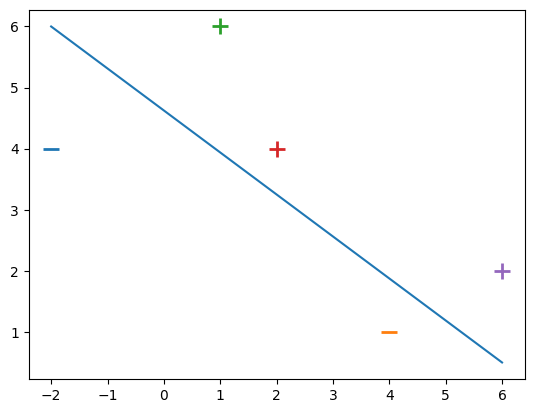

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sense, to randomly pick a sample during each iteration in the for-loop.

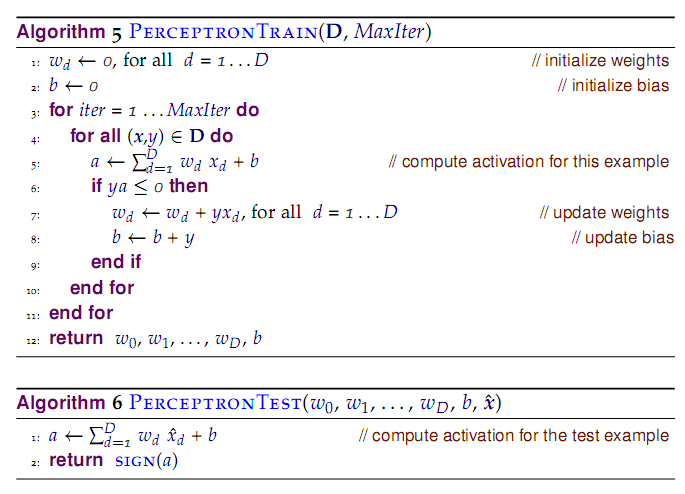

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0: # This line checks if the preceptron algo is incorrect.
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i] # Update weights to improve future predictions.
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

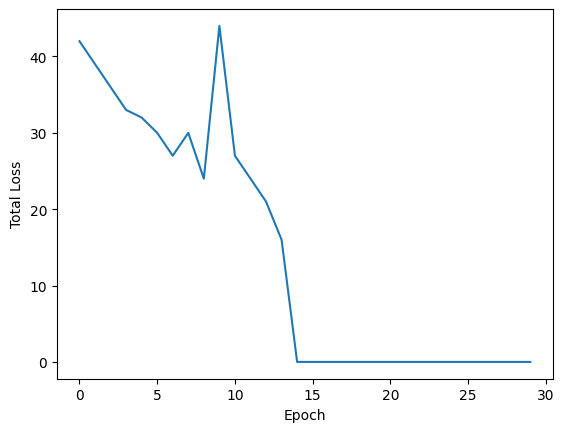

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

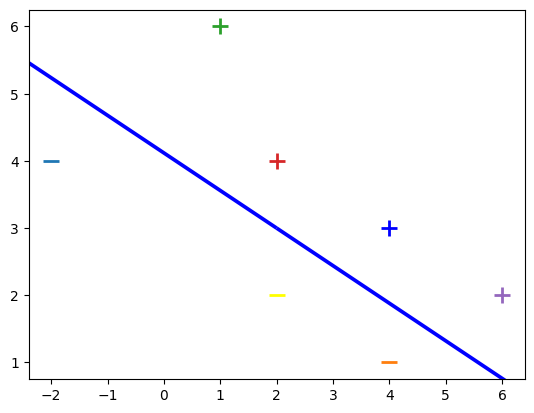

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



---
### Answers


Saving sonar.csv to sonar.csv


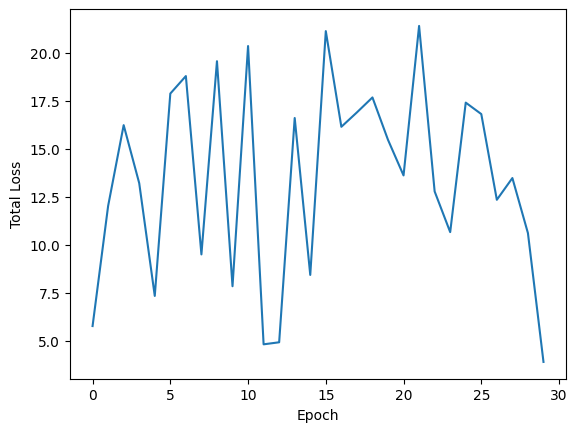

In [10]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("sonar.csv", header=0)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y = np.where(y == 'R', -1, 1)
w = perceptron_algo_plot(X, y)

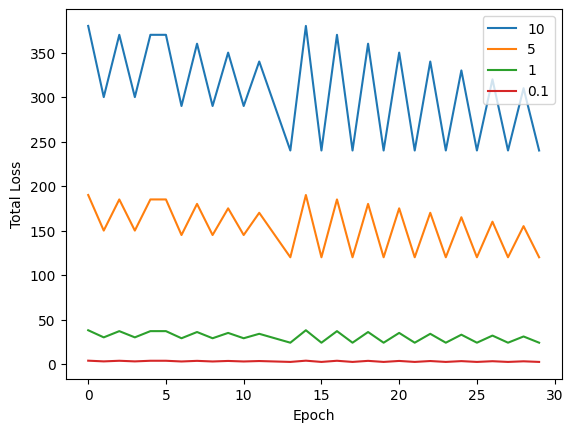

In [19]:
def perceptron_algo_plot(X, Y,eta = 1):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors,label=eta)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.legend()


perceptron_algo_plot(X, y, 10)
perceptron_algo_plot(X, y, 5)
perceptron_algo_plot(X, y, 1)
perceptron_algo_plot(X, y, 0.1)

Observations



*   smaller learning rates leads to slower but steadier progress towards convergence
*   larger learning rates can result in faster initial progress but also introduce instability.



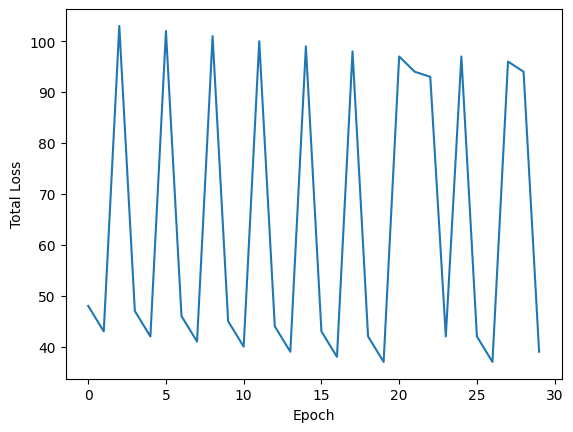

In [12]:
X = np.array([
    [2, 3, -1],
    [3, 2, -1],
    [4, 5, -1],
    [5, 4, -1],
    [6, 6, -1]
])
y = np.array([-1, -1, 1, 1, -1])
perceptron_algo_plot(X,y)

Observation

If the data can't be separated by a single line, the Perceptron algorithm won't find a perfect solution and will keep changing its guesses without settling on one


---

In [13]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [14]:
y = np.array([-1, -1, 1, -1, -1])

None


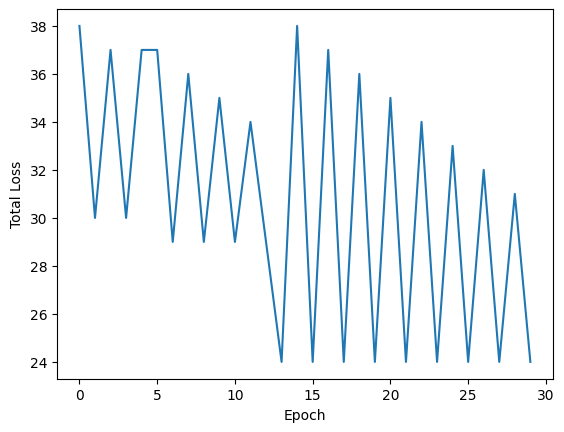

In [15]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

#Answers



**1.** Yes, this dataset, representing the boolean AND function, is linearly separable.

| x1 | x2 | y |
|---|---|---|
| 0 | 0 | - |
| 0 | 1 | - |
| 1 | 0 | - |
| 1 | 1 | + |

 Weight Update Procedure:

Let's visualize the weight updates step-by-step, assuming an initial weight vector w0 = [0, 0] and bias b0 = 0. We'll use a learning rate of 1 for simplicity.

Iteration 1:

* Input: x = [0, 0], y = -
* Prediction: w0 · x + b0 = [0, 0] · [0, 0] + 0 = 0
  * Since the prediction is 0, we consider it as negative (-).
* Error: Prediction is -, target is -. No error, no weight update.

Iteration 2:

* Input: x = [0, 1], y = -
* Prediction: w0 · x + b0 = [0, 0] · [0, 1] + 0 = 0 (considered -)
* Error: Prediction is -, target is -. No error, no weight update.

Iteration 3:

* Input: x = [1, 0], y = -
* Prediction: w0 · x + b0 = [0, 0] · [1, 0] + 0 = 0 (considered -)
* Error: Prediction is -, target is -. No error, no weight update.

Iteration 4:

* Input: x = [1, 1], y = +
* Prediction: w0 · x + b0 = [0, 0] · [1, 1] + 0 = 0 (considered -)
* Error: Prediction is -, target is +. Misclassification! Update weights:
  * w1 = w0 + learning_rate * (y * x) = [0, 0] + 1 * (+1 * [1, 1]) = [1, 1]
  * b1 = b0 + learning_rate * y = 0 + 1 * (+1) = 1

Iteration 5:

* Input: x = [0, 0], y = -
* Prediction: w1 · x + b1 = [1, 1] · [0, 0] + 1 = 1 (considered +)
* Error: Prediction is +, target is -. Misclassification! Update weights:
  * w2 = w1 + learning_rate * (y * x) = [1, 1] + 1 * (-1 * [0, 0]) = [1, 1] (no change in weights)
  * b2 = b1 + learning_rate * y = 1 + 1 * (-1) = 0




**2.** Out of the 16 possible boolean functions over 2-bit binary inputs, 14 are learnable by a perceptron.

 The two functions that are not learnable by perceptron are XOR and XNOR

 truth tables:

XOR

| x1 | x2 | Output |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

 XNOR

| x1 | x2 | Output |
|---|---|---|
| 0 | 0 | 1 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |